In [63]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
import numpy as np
import pandas as pd

In [64]:
fish_data = np.column_stack((fish_length, fish_weight)) # 두 리스트를 nx2 행렬로 만들기
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 두 리스트 이어 붙이기 n+m 

fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [65]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [44]:
print(train_target)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [66]:
# k - 최근접 이웃을 훈련

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [67]:
# 이제 수상한 도미 한머리의 값을 이 모델에 넣어 어떻게 예측하는지 보자

print(kn.predict([[25,150]]))
#방어로 구분함.

[0.]


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

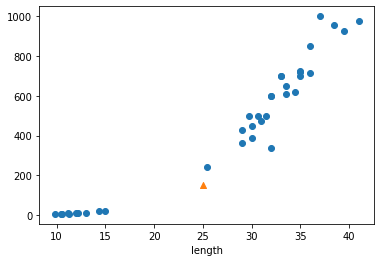

In [71]:
import matplotlib.pyplot as plt


plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel


In [76]:
distances, indexs = kn.kneighbors([[25,150]])

Text(0, 0.5, 'weight')

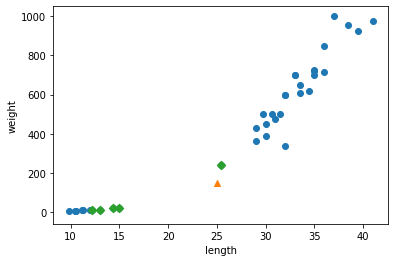

In [77]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

(0, 1000)

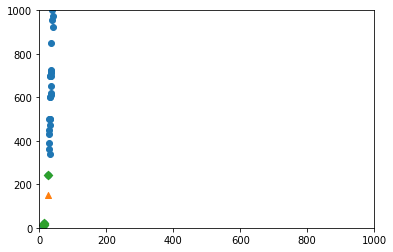

In [79]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexs,0],train_input[indexs,1],marker='D')
plt.xlim((0,1000))
plt.ylim((0,1000))

In [83]:
mean = np.mean(train_input,axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [85]:
train_scaled = (train_input-mean)/std

Text(0, 0.5, 'weight')

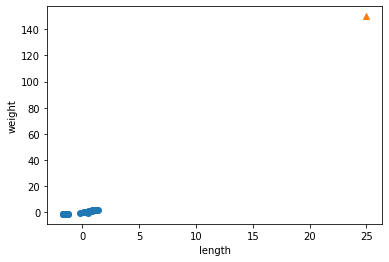

In [89]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

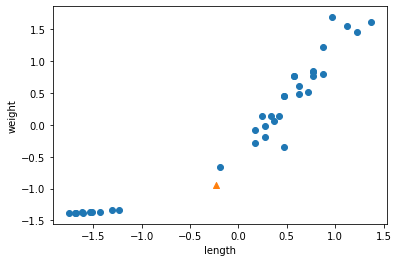

In [93]:

new = ([25,150] - mean) /std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [95]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
test_scaled=(test_input - mean) / std

In [99]:
kn.score(test_scaled, test_target)

1.0

In [102]:
kn.predict([new])

array([1.])

Text(0, 0.5, 'weight')

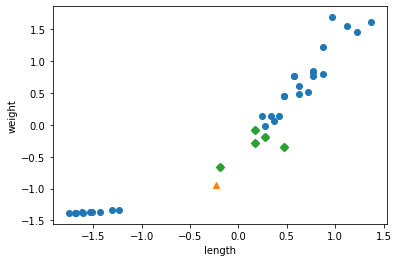

In [106]:
distance , indexs = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexs,0],train_scaled[indexs,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')